# 1. Necessary imports

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn import svm
import numpy as np
import itertools
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
plt.style.use('seaborn-poster')
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 2. Load data from CSV File

In [27]:
data = pd.read_csv('./data_recieved.csv')

In [28]:
data

,Chatty,Safety,Punctuality,Friendliness,Comfortability,UTT,Class_Received
0,0,0,3,0,4,15,Chatty
1,2,3,4,2,5,20,Safety
2,3,3,5,1,0,20,Safety
3,2,5,3,3,3,10,Comfortability
4,5,4,3,3,5,30,Comfortability
...,...,...,...,...,...,...,...
19995,0,3,3,2,1,30,NaN
19996,2,1,5,3,1,25,NaN
19997,4,4,1,2,1,20,NaN
19998,2,1,5,0,0,25,NaN


In [29]:
drop_DF = data.dropna()
drop_DF

,Chatty,Safety,Punctuality,Friendliness,Comfortability,UTT,Class_Received
0,0,0,3,0,4,15,Chatty
1,2,3,4,2,5,20,Safety
2,3,3,5,1,0,20,Safety
3,2,5,3,3,3,10,Comfortability
4,5,4,3,3,5,30,Comfortability
...,...,...,...,...,...,...,...
17919,1,5,4,2,2,20,Chatty
17920,0,0,5,4,5,25,Chatty
17921,1,5,1,1,4,30,Chatty
17922,5,5,3,2,1,20,Chatty


In [30]:
drop_DF

,Chatty,Safety,Punctuality,Friendliness,Comfortability,UTT,Class_Received
0,0,0,3,0,4,15,Chatty
1,2,3,4,2,5,20,Safety
2,3,3,5,1,0,20,Safety
3,2,5,3,3,3,10,Comfortability
4,5,4,3,3,5,30,Comfortability
...,...,...,...,...,...,...,...
17919,1,5,4,2,2,20,Chatty
17920,0,0,5,4,5,25,Chatty
17921,1,5,1,1,4,30,Chatty
17922,5,5,3,2,1,20,Chatty


In [31]:
br = np.array([3,4,3,3,4])
r1 = np.array([4,4,3,5,3])
r2 = np.array([2,1,5,1,1])
import math
 
def dotproduct(v1, v2):
  return sum((a*b) for a, b in zip(v1, v2))
 
def length(v):
  return math.sqrt(dotproduct(v, v))
 
def cos(v1, v2):
  return math.cos(dotproduct(v1, v2) / (length(v1) * length(v2)))
print(dotproduct(br,r1)) #7.681145747868608   8.660254037844387
print(length(br)*length(r1))
print(dotproduct(br,r1)/(length(br)*length(r1)))
print(math.cos(dotproduct(br,r1)/(length(br)*length(r1))))
print(dotproduct(br,r2)) #7.681145747868608   8.660254037844387
print(length(br)*length(r2))
print(dotproduct(br,r2)/(length(br)*length(r2)))
print(math.cos(dotproduct(br,r2)/(length(br)*length(r2))))

64
66.52067347825036
0.9621069158436208
0.5717927467009977
32
43.45112196480086
0.7364596943186588
0.7408511111766498


# 3. Distribution of the classes

<AxesSubplot:xlabel='Punctuality', ylabel='Friendliness'>

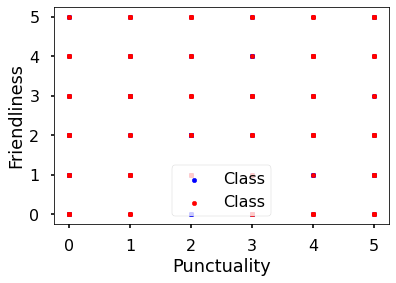

In [32]:
chatty_df = drop_DF[drop_DF['Class_Received']== 'Chatty'][0:200]
safety_df = drop_DF[drop_DF['Class_Received']== 'Safety'][0:200]
punctuality_df = drop_DF[drop_DF['Class_Received']== 'Punctuality'][0:200]
friendliness_df = drop_DF[drop_DF['Class_Received']== 'Friendliness'][0:200]
comfortability_df = drop_DF[drop_DF['Class_Received']== 'Comfortability'][0:200]

axes = chatty_df.plot(kind='scatter', x='Punctuality', y='Friendliness', color='blue',label='Class')
safety_df.plot(kind='scatter', x='Punctuality', y='Friendliness', color='red',label='Class', ax=axes)


In [33]:
count_chatty = 0
count_safety = 0
count_punctuality = 0
count_friendliness = 0
count_comfortability = 0
for i in drop_DF['Class_Received']:
  if i == "Chatty":
    count_chatty = count_chatty + 1
  if i == "Safety":
    count_safety = count_safety + 1
  if i == "Punctuality":
    count_punctuality = count_punctuality + 1
  if i == "Friendliness":
    count_friendliness = count_friendliness + 1
  if i == "Comfortability":
    count_comfortability = count_comfortability + 1
print(count_chatty)
print(count_safety)
print(count_punctuality)
print(count_friendliness)
print(count_comfortability)

7381
978
8949
0
616


# 4. Remove unwanted columns

In [34]:
drop_DF.columns

feature_df = drop_DF[['Chatty', 'Safety', 'Punctuality', 'Friendliness', 'Comfortability',
       'UTT']]
X = np.asarray(feature_df)
y = np.asarray(drop_DF['Class_Received'])

In [35]:
X[0:5]

array([[ 0,  0,  3,  0,  4, 15],
       [ 2,  3,  4,  2,  5, 20],
       [ 3,  3,  5,  1,  0, 20],
       [ 2,  5,  3,  3,  3, 10],
       [ 5,  4,  3,  3,  5, 30]], dtype=int64)

In [36]:
y[0:5]

array(['Chatty', 'Safety', 'Safety', 'Comfortability', 'Comfortability'],
      dtype=object)

# 5. Divide the data as Train/Test dataset

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# 14339 x 6
X_train.shape

# 14339 x 1
y_train.shape

# 3585 x 6
X_test.shape

# 3585 x 1
y_test.shape

(3585,)

# 6. Modeling (SVM with Scikit-learn)

In [38]:
classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(X_train, y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [39]:
y_predict = classifier.predict(X_test)

In [40]:
y_predict

array(['Punctuality', 'Punctuality', 'Punctuality', ..., 'Punctuality',
       'Punctuality', 'Punctuality'], dtype=object)

# 7. Result

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

                precision    recall  f1-score   support

        Chatty       0.00      0.00      0.00      1499
Comfortability       0.00      0.00      0.00       125
   Punctuality       0.49      1.00      0.66      1755
        Safety       0.00      0.00      0.00       206

      accuracy                           0.49      3585
     macro avg       0.12      0.25      0.16      3585
  weighted avg       0.24      0.49      0.32      3585



c:\users\ltduo\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ltduo\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ltduo\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo